In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tools

In [3]:
%load_ext rmagic 
%R library(ez)

# Import some stuff from mpl for customizing colors:
import matplotlib.colors as co
import matplotlib.cm as cm

# Import our own analysis stuff
import tools
import scipy.stats as stats
import pandas as pd

/Users/arokem/anaconda/lib/python3.4/site-packages/IPython/extensions/rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


In [4]:
cue_conds = ['cued', 'other', 'neutral']
# Which function to use for plotting: 
plot_func=tools.cumgauss
# Should match up with whatever you use for fitting:
fit_func='cumgauss'
path_to_files='/Users/arokem/projects/att_ss/data/'
# We're going to use these colors to mark the different conditions.
# Made with http://colorbrewer2.org, to be qualitative, color-blind safe and printer-friendly:
colors = dict(cued=np.array([17, 148, 109])/255.,
              other=np.array([207, 85, 1])/255., 
              neutral=np.array([107, 102, 169])/255.)
relative_oris = [0, 90]

In [5]:
contrasts = 0.3 + np.array( [-0.29, -0.2, -0.1, 0., 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.6])
contrast_divs = zip(np.concatenate([[0], contrasts[:-1]]), np.concatenate([contrasts[1:], [1]]))
contrast_divs = [(0, 0.19),
                 (0.19, 0.31),
                 (0.31, 0.54),
                 (0.54, 0.64),
                 (0.64, 1.0)]

#contrast_divs = [(0, 0.2),
#                 (0.29, 0.31),
#                 (0.6, 1)]

#contrast_divs = [(0, 0.02),
#                 (0.02, 0.11),
#                 (0.11, 0.21),
#                 (0.21, 0.31),
#                 (0.31, 0.41),
#                 (0.41, 0.51),
#                 (0.51, 0.56),
#                 (0.56, 0.61),
#                 (0.61, 0.71),
#                 #(0.66, 0.71),       
#                 (0.71, 1.0)]

contrast_divs, contrasts
#contrasts.shape
#[contrasts[1:], 1])

([(0, 0.19), (0.19, 0.31), (0.31, 0.54), (0.54, 0.64), (0.64, 1.0)],
 array([ 0.01,  0.1 ,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.55,  0.6 ,  0.65,
         0.7 ,  0.9 ]))

In [6]:
df1_list = []
df2_list = []
contrasts_used = []

for distractor_low, distractor_high in contrast_divs:
    contrasts_used.append(np.concatenate([contrasts[np.logical_and(contrasts>distractor_low, 
                                                                   contrasts<distractor_high)]]))
    df1, df2 = tools.get_df(17,
          path_to_files=path_to_files,
          boots=1,
		  exclude=[13, 8],
		  cue_conds=cue_conds,
	      fit_func=fit_func,
          distractor_high=distractor_high,
          distractor_low=distractor_low,
          verbose=False)
    df1_list.append(df1)
    df2_list.append(df2)


/Users/arokem/anaconda/lib/python3.4/site-packages/scipy/optimize/minpack.py:419: RuntimeWarning: Number of calls to function has reached maxfev = 600.
  warnings.warn(errors[info][0], RuntimeWarning)


In [8]:
n_subjects = len(df1.columns)
this_cue_conds = ['cued', 'neutral', 'other']
cNorm  = co.Normalize(vmin=0, vmax=n_subjects)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=matplotlib.cm.gist_rainbow)
sub_colors = scalarMap.to_rgba(range(n_subjects))

sub_markers = ['s', 'o', '^'] * (int(n_subjects/3))
titles = ['Bias', 'Sensitivity']
ori_labels = ['parallel', 'orthogonal']


In [10]:
bias_list = []
sens_list = []
for df1 in df1_list:
    bias = {}
    sens = {}

    for ori_idx, ori in enumerate([(0,0),(0,90),(90,0),(90,90)]):
        rel_ori = np.abs(ori[0]-ori[1])
        if not rel_ori in bias.keys():
            bias[rel_ori] = dict(cued=[], other=[], neutral=[])
            sens[rel_ori] = dict(cued=[], other=[], neutral=[])

        for cue_idx, cue_cond in enumerate(cue_conds): 
            for sub in df1.columns:
                bias[rel_ori][cue_cond].append(df1[sub][ori][cue_cond]['fit'][0][0])
                sens[rel_ori][cue_cond].append(df1[sub][ori][cue_cond]['fit'][0][1])
    bias_list.append(bias)
    sens_list.append(sens)

In [11]:
# First we check the reliability of this binning scheme:

cued_bias_para = np.array([this[0]['cued'] for this in bias_list])
other_bias_para = np.array([this[0]['other'] for this in bias_list])
neutral_bias_para= np.array([this[0]['neutral'] for this in bias_list])

cued_bias_ortho = np.array([this[90]['cued'] for this in bias_list])
other_bias_ortho = np.array([this[90]['other'] for this in bias_list])
neutral_bias_ortho = np.array([this[90]['neutral'] for this in bias_list])

cued_sens_para = np.array([this[0]['cued'] for this in sens_list])
other_sens_para = np.array([this[0]['other'] for this in sens_list])
neutral_sens_para= np.array([this[0]['neutral'] for this in sens_list])

cued_sens_ortho = np.array([this[90]['cued'] for this in sens_list])
other_sens_ortho = np.array([this[90]['other'] for this in sens_list])
neutral_sens_ortho = np.array([this[90]['neutral'] for this in sens_list])


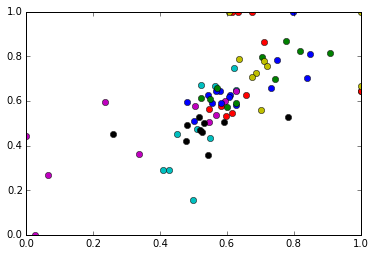

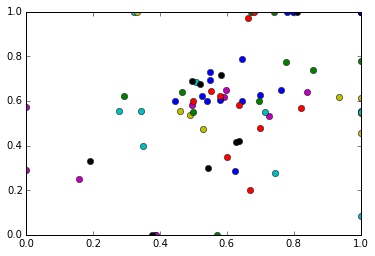

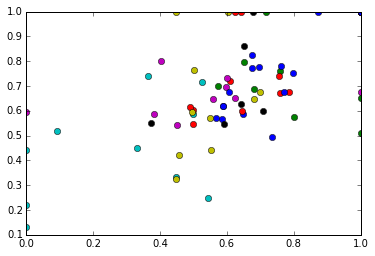

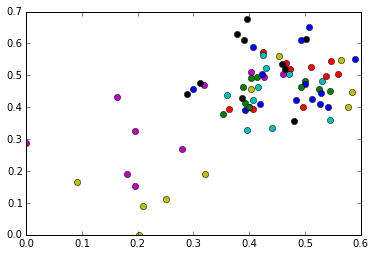

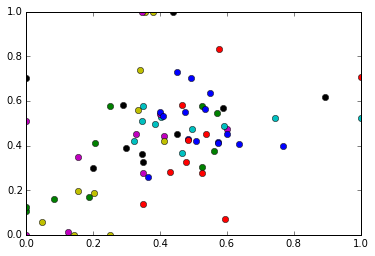

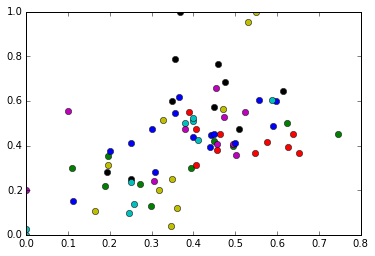

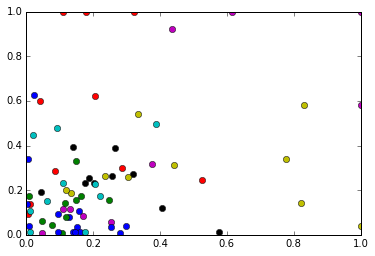

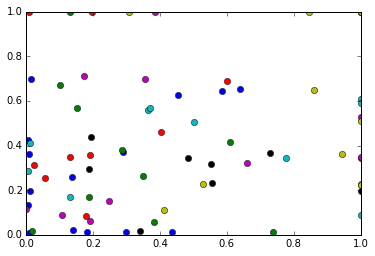

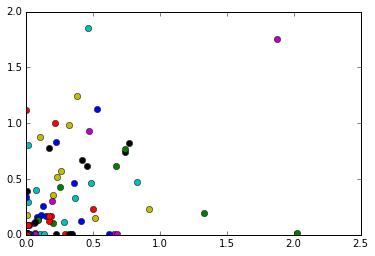

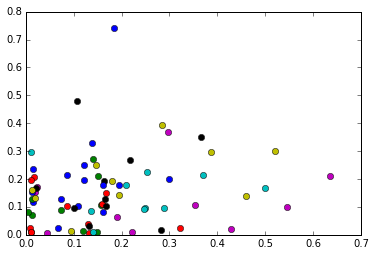

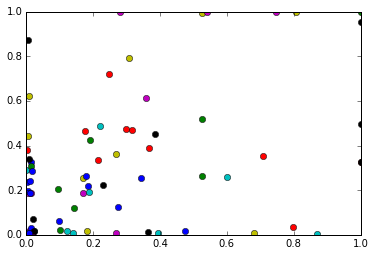

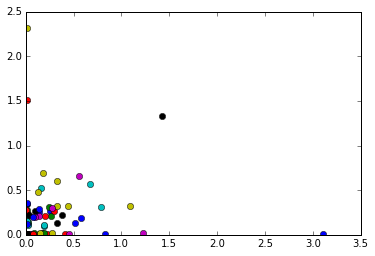

In [12]:
for this in [cued_bias_para, other_bias_para, neutral_bias_para, 
             cued_bias_ortho, other_bias_ortho, neutral_bias_ortho,
             cued_sens_para, other_sens_para, neutral_sens_para,
             cued_sens_ortho, other_sens_ortho, neutral_sens_ortho]:
    fig, ax = plt.subplots(1)
    ax.plot(this[:, :n_subjects], this[:, n_subjects:], 'o')


In [13]:
cued_bias_para = np.array([np.mean(np.reshape(this[0]['cued'], (-1, n_subjects)), 0) for this in bias_list])
other_bias_para = np.array([np.mean(np.reshape(this[0]['other'], (-1, n_subjects)), 0) for this in bias_list])
neutral_bias_para= np.array([np.mean(np.reshape(this[0]['neutral'], (-1, n_subjects)), 0) for this in bias_list])

cued_bias_ortho = np.array([np.mean(np.reshape(this[90]['cued'], (-1, n_subjects)), 0) for this in bias_list])
other_bias_ortho = np.array([np.mean(np.reshape(this[90]['other'], (-1, n_subjects)), 0) for this in bias_list])
neutral_bias_ortho = np.array([np.mean(np.reshape(this[90]['neutral'], (-1, n_subjects)), 0) for this in bias_list])

cued_sens_para = np.array([np.mean(np.reshape(this[0]['cued'], (-1, n_subjects)), 0) for this in sens_list])
other_sens_para = np.array([np.mean(np.reshape(this[0]['other'], (-1, n_subjects)), 0) for this in sens_list])
neutral_sens_para= np.array([np.mean(np.reshape(this[0]['neutral'], (-1, n_subjects)), 0) for this in sens_list])

cued_sens_ortho = np.array([np.mean(np.reshape(this[90]['cued'], (-1, n_subjects)), 0) for this in sens_list])
other_sens_ortho = np.array([np.mean(np.reshape(this[90]['other'], (-1, n_subjects)), 0) for this in sens_list])
neutral_sens_ortho = np.array([np.mean(np.reshape(this[90]['neutral'], (-1, n_subjects)), 0) for this in sens_list])


In [14]:
cued_bias_para.shape

(5, 15)

In [15]:
contrasts_used

[array([ 0.01,  0.1 ]),
 array([ 0.2,  0.3]),
 array([ 0.4,  0.5]),
 array([ 0.55,  0.6 ]),
 array([ 0.65,  0.7 ,  0.9 ])]

In [16]:
x = np.array([np.mean(i) for i in contrasts_used])
#x = contrasts
data_array = np.array([[[cued_bias_para, other_bias_para, neutral_bias_para],
                        [cued_bias_ortho, other_bias_ortho, neutral_bias_ortho]],
                        [[cued_sens_para, other_sens_para, neutral_sens_para],
                        [cued_sens_ortho, other_sens_ortho, neutral_sens_ortho]]])
             
data_array.shape

(2, 2, 3, 5, 15)

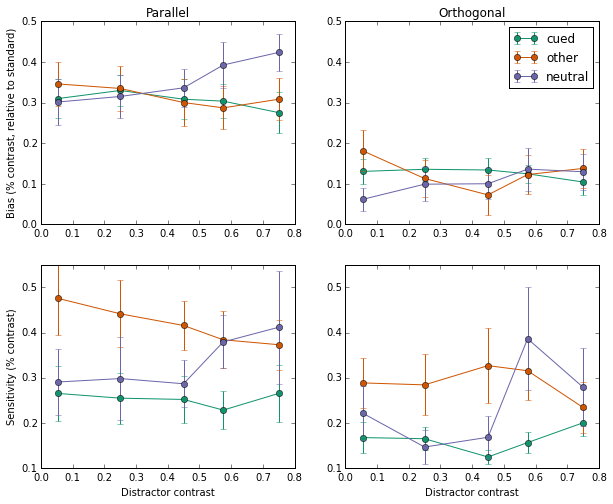

In [17]:
conds = ['cued', 'other', 'neutral']
fig, axes = plt.subplots(2,2)
for i in range(data_array.shape[0]):
    if i == 0:
        ylim = [0, 0.5]
    else:
        ylim = [0.1, 0.55]
    for j in range(data_array.shape[1]):
        ax = axes[i,j]
        for cond_idx, y in enumerate(data_array[i,j]):
            if i == 0:
                y = y - 0.3
            ax.errorbar(x, np.mean(y, -1), yerr=stats.sem(y, -1), marker='o', 
                        label=conds[cond_idx], color=colors[conds[cond_idx]])
            ax.set_ylim(ylim)
            ax.set_xlim([0,0.8])

axes[0,0].set_ylabel('Bias (% contrast, relative to standard)')
axes[1,0].set_ylabel('Sensitivity (% contrast)')
axes[0,1].legend()
axes[0,0].set_title('Parallel')
axes[0,1].set_title('Orthogonal')
axes[1,0].set_xlabel('Distractor contrast')
axes[1,1].set_xlabel('Distractor contrast')

    
fig.set_size_inches([10,8])
fig.savefig('./data/figures/distractor.svg')
fig.savefig('./data/figures/distractor.png')


In [18]:
df_subjects = []
df_conds = []
df_rel_ori = []
df_distract = []
df_bias = []
df_sens = []

# para/ortho
for i in range(data_array.shape[1]):
    this_relative_ori = relative_oris[i]
    # cued/other/neutral
    for j in range(data_array.shape[2]):
        this_cond = conds[j]        
        # distractor
        for k in range(data_array.shape[3]):
            this_distractor = x[k]
            #df_subjects.append(np.concatenate([np.arange(1, n_subjects +1 ), np.arange(1, n_subjects + 1)]))
            #df_conds.append([this_cond] * n_subjects * 2)
            #df_rel_ori.append([this_relative_ori] * n_subjects * 2)
            #df_distract.append([this_distractor] * n_subjects * 2)
            df_subjects.append(np.arange(1, n_subjects +1))
            df_conds.append([this_cond] * n_subjects)
            df_rel_ori.append([this_relative_ori] * n_subjects)
            df_distract.append([this_distractor] * n_subjects)
            df_bias.append(data_array[0,i,j,k])
            df_sens.append(data_array[1,i,j,k])


df_subjects = np.concatenate(df_subjects)
df_conds = np.concatenate(df_conds)
df_rel_ori = np.concatenate(df_rel_ori)
df_distract = np.concatenate(df_distract)
df_bias = np.concatenate(df_bias)
df_sens = np.concatenate(df_sens)
my_pd_dict = {'subject':df_subjects,
              'cue':df_conds,
              'rel_ori':df_rel_ori,
              'distract':df_distract,
              'bias':df_bias,
              'sens':df_sens}

my_pd = pd.DataFrame(my_pd_dict)

In [19]:
%%R -i my_pd

aov_th = ezANOVA(my_pd,
                 wid=.(subject),
                 dv=.(bias),
                 within=.(cue, rel_ori, distract),
                 )

print("ANOVA:BIAS")
print(aov_th)

aov_sens = ezANOVA(my_pd,
                 wid=.(subject),
                 dv=.(sens),
                 within=.(cue, rel_ori, distract),
                 )

print("ANOVA:SENSITIVITY")
print(aov_sens)


[1] "ANOVA:BIAS"
$ANOVA
                Effect DFn DFd           F            p p<.05          ges
1                  cue   2  28  0.09284947 0.9116100772       0.0022054717
2              rel_ori   1  14 28.41563308 0.0001061093     * 0.4111553828
3             distract   1  14  0.47925315 0.5000827787       0.0004762843
4          cue:rel_ori   2  28  1.55954654 0.2279477943       0.0149934220
5         cue:distract   2  28  7.72955007 0.0021236465     * 0.0324144380
6     rel_ori:distract   1  14  0.06491835 0.8025892884       0.0002246512
7 cue:rel_ori:distract   2  28  0.49777864 0.6131574328       0.0022352514

[1] "ANOVA:SENSITIVITY"
$ANOVA
                Effect DFn DFd          F            p p<.05         ges
1                  cue   2  28 13.3794510 8.353072e-05     * 0.139634461
2              rel_ori   1  14  9.4560027 8.230047e-03     * 0.109455193
3             distract   1  14  0.5196487 4.828561e-01       0.002653285
4          cue:rel_ori   2  28  0.1936974 8.250018e-

In [20]:
stats.ttest_rel(neutral_bias_para.T, np.mean([other_bias_para, cued_bias_para], 0).T )

(array([-0.41919177, -0.35450349,  0.52601606,  1.66488813,  1.97005065]),
 array([ 0.68143676,  0.72824458,  0.60710973,  0.11814615,  0.06894263]))

In [21]:
stats.ttest_rel(neutral_bias_ortho.T, np.mean([other_bias_ortho, cued_bias_ortho], 0).T )

(array([-2.84668003, -0.71000916, -0.10050223,  0.24145904,  0.16294423]),
 array([ 0.01293434,  0.48935681,  0.92137069,  0.81270004,  0.872891  ]))

In [22]:
stats.ttest_rel(neutral_sens_para.T, cued_sens_para.T )

(array([ 0.29349106,  0.48201314,  0.51443941,  2.23067802,  1.61830002]),
 array([ 0.77345257,  0.63724498,  0.61496946,  0.04257548,  0.12789881]))

In [23]:
stats.ttest_rel(neutral_sens_para.T, other_sens_para.T)

(array([-2.10351975, -2.12716945, -2.5629153 , -0.05760475,  0.33297949]),
 array([ 0.05398041,  0.05166474,  0.02254528,  0.95487758,  0.74408372]))

In [24]:
stats.ttest_rel(neutral_sens_ortho.T, cued_sens_ortho.T )

(array([ 0.98553049, -0.41937292,  0.87207695,  2.02293267,  0.78654013]),
 array([ 0.34109048,  0.68130746,  0.39787615,  0.06261019,  0.44466173]))

In [25]:
stats.ttest_rel(neutral_sens_ortho.T, other_sens_ortho.T )

(array([-0.99685958, -2.39401779, -1.99564373,  0.51968065,  0.41407602]),
 array([ 0.33575133,  0.03122454,  0.06580831,  0.61140486,  0.6850924 ]))

In [26]:
stats.ttest_rel(neutral_bias_para[0], neutral_bias_para[-1])

(-2.2040341740152738, 0.044760462816059797)

In [27]:
stats.ttest_rel(neutral_bias_ortho[0], neutral_bias_ortho[-1])

(-1.5257774528951851, 0.14933550240156115)

In [28]:
stats.ttest_rel(neutral_sens_para[0], neutral_sens_para[-1])

(-1.0375904994003156, 0.31705053725542115)

In [29]:
stats.ttest_rel(neutral_sens_ortho[0], neutral_sens_ortho[-1])

(-0.470307117469209, 0.64537836248723823)

In [30]:
stats.ttest_rel(other_sens_para[0], other_sens_para[-1])

(1.4482329655682038, 0.16957616185722987)